<a href="https://colab.research.google.com/github/chaudharishital/Deep-Learning/blob/main/flower_classification_using_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shitalchaudhari529","key":"7b8341e8aa269de4199b0a9f35159769"}'}

In [3]:
#create a kaggle folder
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
#copy the kaggle.json to folder created
!cp kaggle.json ~/.kaggle/

In [6]:
#permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
#To list all datasets in kaggle
! kaggle datasets list

ref                                                            title                                              size  lastUpdated          downloadCount  
-------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
yasserh/wine-quality-dataset                                   Wine Quality Dataset                               21KB  2022-01-15 19:15:11           6249  
prasertk/netflix-subscription-price-in-different-countries     Netflix subscription fee in different countries     3KB  2022-01-15 07:06:09           4974  
prasertk/the-best-cities-for-a-workation                       The Best Cities for a Workation                     6KB  2022-02-16 11:46:28            521  
majyhain/height-of-male-and-female-by-country-2022             Height of Male and Female by Country 2022           4KB  2022-02-02 00:40:19           2324  
sanjeetsinghnaik/top-1000-highest-grossing-movies         

In [8]:
!kaggle datasets download -d aksha05/flower-image-dataset

flower-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
!unzip flower-image-dataset.zip

Archive:  flower-image-dataset.zip
replace flowers/bougainvillea_00002.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

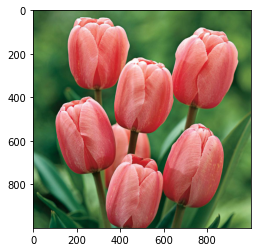

In [10]:


import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Read Images
img = mpimg.imread('flowers/tulip_00081.jpg')

# Output Images
plt.imshow(img)

In [11]:
!pip install keras

In [12]:
import tensorflow as tf
import numpy as np
import cv2
import os
import time
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import Adam,RMSprop,SGD
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

from sklearn.metrics import confusion_matrix

In [13]:
import pathlib
data_dir=pathlib.Path('/content/flowers')

In [14]:
data_dir

PosixPath('/content/flowers')

In [16]:
import os
import os.path
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import shutil

import numpy as np
%matplotlib inline

images = []
count=0
substring1=['bougainvillea','daisies','garden_roses','gardenias','hibiscus','hydrangeas','lilies','orchids','peonies','tulip']

for filename in os.listdir(data_dir):
  for i in substring1:
    if(filename.find(i) != -1):   
        source=str(data_dir)+"/"+filename
        dest = '/content/flowers/'+i+"/"+filename
        dest_folder='/content/flowers/'+i+"/"
        if os.path.isdir(dest_folder):
          destination = shutil.copy(source,dest_folder)
                   
        else: 
          os.mkdir(dest_folder)
          destination = shutil.copy(source,dest_folder)

IsADirectoryError: ignored

In [17]:
images = []
labels = []
substring1=['bougainvillea','daisies','garden_roses','gardenias','hibiscus','hydrangeas','lilies','orchids','peonies','tulip']
bougainvillea_path= '/content/flowers/bougainvillea'
daisies_path= '/content/flowers/daisies'
garden_roses_path= '/content/flowers/garden_roses'
gardenias_path= '/content/flowers/gardenias'
hibiscus_path= '/content/flowers/hibiscus'
hydrangeas_path= '/content/flowers/hydrangeas'
lilies_path= '/content/flowers/lilies'
orchids_path= '/content/flowers/orchids'
peonies_path= '/content/flowers/peonies'
tulip_path= '/content/flowers/tulip'



for im_path in os.listdir(bougainvillea_path):
    try:
        image=bougainvillea_path+"/"+im_path
        print(image)
        img = cv2.imread(image)
        img = cv2.resize(img,(224,224)) # VGG19's default input shape is 224x224
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(0)
    except:
        print("Except")

for im_path in os.listdir(daisies_path):
    try:
        image=daisies_path+"/"+im_path
        print(image)
        img = cv2.imread(image)
        img = cv2.resize(img,(224,224)) # VGG19's default input shape is 224x224
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(1)
    except:
        print("Except")
    
for im_path in os.listdir(garden_roses_path):
    try:
        image=garden_roses_path+"/"+im_path
        print(image)
        img = cv2.imread(image)
        img = cv2.resize(img,(224,224)) # VGG19's default input shape is 224x224
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(2)
    except:
        print("Except")

for im_path in os.listdir(gardenias_path):
    try:
        image=gardenias_path+"/"+im_path
        print(image)
        img = cv2.imread(image)
        img = cv2.resize(img,(224,224)) # VGG19's default input shape is 224x224
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(3)
    except:
        print("Except")

for im_path in os.listdir(hibiscus_path):
    try:
        image=hibiscus_path+"/"+im_path
        print(image)
        img = cv2.imread(image)
        img = cv2.resize(img,(224,224)) # VGG19's default input shape is 224x224
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(4)
    except:
        print("Except")
    
for im_path in os.listdir(hydrangeas_path):
    try:
        image=hydrangeas_path+"/"+im_path
        print(image)
        img = cv2.imread(image)
        img = cv2.resize(img,(224,224)) # VGG19's default input shape is 224x224
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(5)
    except:
        print("Except")
for im_path in os.listdir(lilies_path):
    try:
        image=lilies_path+"/"+im_path
        print(image)
        img = cv2.imread(image)
        img = cv2.resize(img,(224,224)) # VGG19's default input shape is 224x224
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(6)
    except:
        print("Except")

for im_path in os.listdir(orchids_path):
    try:
        image=orchids_path+"/"+im_path
        print(image)
        img = cv2.imread(image)
        img = cv2.resize(img,(224,224)) # VGG19's default input shape is 224x224
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(7)
    except:
        print("Except")
    
for im_path in os.listdir(peonies_path):
    try:
        image=peonies_path+"/"+im_path
        print(image)
        img = cv2.imread(image)
        img = cv2.resize(img,(224,224)) # VGG19's default input shape is 224x224
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(8)
    except:
        print("Except")
for im_path in os.listdir(tulip_path):
    try:
        image=tulip_path+"/"+im_path
        print(image)
        img = cv2.imread(image)
        img = cv2.resize(img,(224,224)) # VGG19's default input shape is 224x224
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(9)
    except:
        print("Except")
    




/content/flowers/bougainvillea/bougainvillea_00020.jpg
/content/flowers/bougainvillea/bougainvillea_00008.jpg
/content/flowers/bougainvillea/bougainvillea_00052.jpg
/content/flowers/bougainvillea/bougainvillea_00078.jpg
/content/flowers/bougainvillea/bougainvillea_00064.jpg
/content/flowers/bougainvillea/bougainvillea_00045.jpg
/content/flowers/bougainvillea/bougainvillea_00051.jpg
/content/flowers/bougainvillea/bougainvillea_00063.jpg
/content/flowers/bougainvillea/bougainvillea_00012.jpg
/content/flowers/bougainvillea/bougainvillea_00015.jpg
/content/flowers/bougainvillea/bougainvillea_00048.jpg
/content/flowers/bougainvillea/bougainvillea_00031.jpg
/content/flowers/bougainvillea/bougainvillea_00072.jpg
/content/flowers/bougainvillea/bougainvillea_00033.jpg
/content/flowers/bougainvillea/bougainvillea_00069.jpg
/content/flowers/bougainvillea/bougainvillea_00055.jpg
/content/flowers/bougainvillea/bougainvillea_00004.jpg
/content/flowers/bougainvillea/bougainvillea_00037.jpg
/content/f

In [18]:

data = np.array(images)
labels = np.array(labels)
print(data.shape)
print(labels.shape)

(733, 224, 224, 3)
(733,)


In [19]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


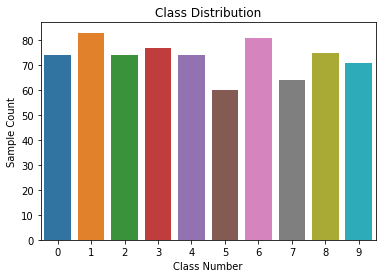

In [20]:
# class distrubiton
plt.subplots(figsize=(6,4))
sns.countplot(labels)
plt.title("Class Distribution")
plt.xlabel("Class Number")
plt.ylabel("Sample Count")
plt.show()

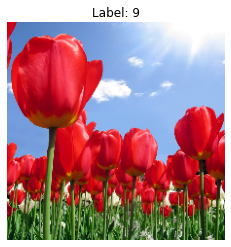

In [21]:
# checking random samples
def check_sample(idx):
    plt.imshow(data[idx])
    plt.title("Label: {}".format(labels[idx]))
    plt.axis("off")
    plt.show()
    
check_sample(711)


In [22]:
# label encoding
labels = to_categorical(labels,num_classes=10)
labels.shape

(733, 10)

In [23]:
labels[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:
# train test splitting
x_train,x_test,y_train,y_test = train_test_split(data,labels)

print("x_train shape ",x_train.shape)
print("x_test shape" ,x_test.shape)
print("y_train shape ",y_train.shape)
print("y_test shape ",y_test.shape)

x_train shape  (549, 224, 224, 3)
x_test shape (184, 224, 224, 3)
y_train shape  (549, 10)
y_test shape  (184, 10)


In [25]:
VGG = VGG19(weights="imagenet")
VGG.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

#Preprocess the input data so that model will fit correctly

In [26]:
## Preprocessing input
from tensorflow.keras.applications.vgg16 import preprocess_input
x_train = preprocess_input(x_train) 
x_test = preprocess_input(x_test)


In [27]:
x_train.shape

(549, 224, 224, 3)

In [28]:
# creating a blank model
model = Sequential()

# adding layers
for i in range(len(VGG.layers)-1):
    model.add(VGG.layers[i])

In [29]:
x_train.shape

(549, 224, 224, 3)

In [30]:
model.layers

In [31]:
# freezing layers
for layer in model.layers:
    layer.trainable = False
    

In [32]:
x_train.shape

(549, 224, 224, 3)

In [33]:
# adding prediction layer
model.add(Dense(10,activation="softmax"))

In [34]:
x_train.shape

(549, 224, 224, 3)

In [35]:
optim = Adam(lr=1e-4)
model.compile(optimizer=optim,loss="categorical_crossentropy",metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [36]:
x_train.shape

(549, 224, 224, 3)

**Training and Evaluating Results**

In [41]:
#don't run it
# Data Augmentation

datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True
                            )

datagen.fit(x_train)
#x_val = x_train[-300:]
#y_val = y_train[-300:]
#x_train = x_train[:-300]
#y_train = y_train[:-300]

In [44]:
x_train.shape

(549, 224, 224, 3)

In [45]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [47]:
history = model.fit_generator(datagen.flow(x_train,y_train,batch_size=32),epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


18/18 [==============================] - 262s 15s/step - loss: 2.2834 - accuracy: 0.2678
Epoch 2/10
18/18 [==============================] - 266s 15s/step - loss: 1.5825 - accuracy: 0.4754
Epoch 3/10
18/18 [==============================] - 261s 14s/step - loss: 1.1866 - accuracy: 0.6193
Epoch 4/10
18/18 [==============================] - 260s 14s/step - loss: 1.0114 - accuracy: 0.6794
Epoch 5/10
18/18 [==============================] - 260s 14s/step - loss: 0.8402 - accuracy: 0.7359
Epoch 6/10
18/18 [==============================] - 260s 14s/step - loss: 0.7404 - accuracy: 0.7668
Epoch 7/10
18/18 [==============================] - 260s 14s/step - loss: 0.6556 - accuracy: 0.8233
Epoch 8/10
18/18 [==============================] - 259s 14s/step - loss: 0.5903 - accuracy: 0.8342
Epoch 9/10
18/18 [==============================] - 260s 14s/step - loss: 0.5497 - accuracy: 0.8434
Epoch 10/10
18/18 [==============================] - 259s 14s/step - loss: 0.4799 - accuracy: 0.8743


In [48]:
print("x_train shape ",x_train.shape)
print("x_test shape" ,x_test.shape)
print("y_train shape ",y_train.shape)
print("y_test shape ",y_test.shape)

x_train shape  (549, 224, 224, 3)
x_test shape (184, 224, 224, 3)
y_train shape  (549, 10)
y_test shape  (184, 10)


In [49]:
model.evaluate(x_test,y_test)

6/6 [==============================] - 93s 14s/step - loss: 0.6192 - accuracy: 0.7989


[0.6192049980163574, 0.7989130616188049]

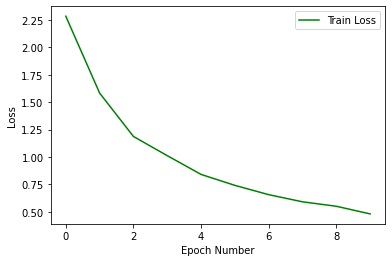

In [50]:
# loss graph
plt.subplots(figsize=(6,4))
plt.plot(history.epoch,history.history["loss"],color="green",label="Train Loss")
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.legend()
plt.show()

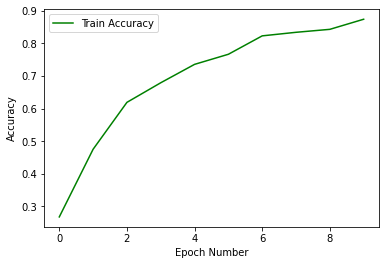

In [51]:
plt.subplots(figsize=(6,4))
plt.plot(history.epoch,history.history["accuracy"],color="green",label="Train Accuracy")
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [53]:


y_pred=model.predict(x_train) 


In [54]:
y_pred

array([[2.6520279e-03, 1.8511190e-03, 1.4746118e-02, ..., 2.9962385e-02,
        1.1524751e-02, 6.3377945e-03],
       [6.4488685e-01, 1.6606214e-03, 1.7625317e-01, ..., 9.0976886e-04,
        5.2320316e-02, 3.2402803e-03],
       [8.7302580e-04, 4.9506525e-05, 5.3258166e-03, ..., 2.8678436e-02,
        3.7210692e-02, 2.5016252e-02],
       ...,
       [4.8594517e-03, 5.7618774e-04, 7.5960092e-02, ..., 2.4292150e-03,
        2.9532570e-01, 3.8047563e-04],
       [2.5875955e-03, 3.4435596e-03, 4.9412463e-02, ..., 4.0030967e-02,
        6.1098017e-02, 1.0426862e-02],
       [9.4689086e-02, 1.0737018e-03, 5.8040398e-01, ..., 5.5678934e-04,
        2.6813224e-01, 1.2139428e-03]], dtype=float32)

In [55]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [56]:
import keras

predicted label is 9 and maximum score is 0.9865543842315674 :
The first prediction for flower is: tulip
The second prediction for flower is: orchids
The third prediction for flower is: lilies


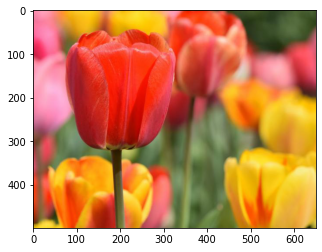

In [122]:
input_image="/content/tulips-multicolored.jpg"
# Read Images
img = mpimg.imread(input_image)

# Output Images
plt.imshow(img)

img = keras.preprocessing.image.load_img(
   input_image , target_size=(224,224)
)




img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)

score = predictions[0]

result = np. where(score == np. amax(score))
#x=result.astype(int)

for i in result:
  x=int(i)
print('predicted label is {} and maximum score is {} :'.format( x,np.amax(score)))


substring1=['bougainvillea','daisies','garden_roses','gardenias','hibiscus','hydrangeas','lilies','orchids','peonies','tulip']
labels1=[0,1,2,3,4,5,6,7,8,9]
count=0
for i in substring1:
  if(count==x):
    print("The first prediction for flower is:",i)
    count=count+1
    break
  else:
    count=count+1
#print(score*100)
score = np. delete(score, count-1)

substring1.remove(i)


result = np. where(score == np. amax(score))
#print(score*100)
for i in result:
  x=int(i)
#print('predicted label is {} and maximum score is {} :'.format( x,np.amax(score)))
print("The second prediction for flower is:",substring1[x])
#print(score*100)
substring1.remove(substring1[x])
#print(substring1)
score = np. delete(score, 2)
result = np. where(score == np. amax(score))
#print(score*100)
for i in result:
  x=int(i)
#print('predicted label is {} and maximum score is {} :'.format( x,np.amax(score)))
print("The third prediction for flower is:",substring1[x])









predicted label is 1 and maximum score is 0.9338693022727966 :
The first prediction for flower is: daisies
The second prediction for flower is: hibiscus
The third prediction for flower is: gardenias


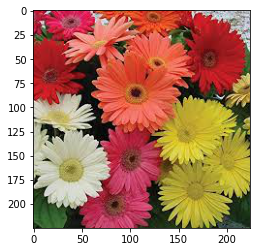

In [128]:
input_image="/images.jpg"
# Read Images
img = mpimg.imread(input_image)

# Output Images
plt.imshow(img)

img = keras.preprocessing.image.load_img(
   input_image , target_size=(224,224)
)




img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)

score = predictions[0]

result = np. where(score == np. amax(score))
#x=result.astype(int)

for i in result:
  x=int(i)
print('predicted label is {} and maximum score is {} :'.format( x,np.amax(score)))


substring1=['bougainvillea','daisies','garden_roses','gardenias','hibiscus','hydrangeas','lilies','orchids','peonies','tulip']
labels1=[0,1,2,3,4,5,6,7,8,9]
count=0
for i in substring1:
  if(count==x):
    print("The first prediction for flower is:",i)
    count=count+1
    break
  else:
    count=count+1
#print(score*100)
score = np. delete(score, count-1)

substring1.remove(i)


result = np. where(score == np. amax(score))
#print(score*100)
for i in result:
  x=int(i)
#print('predicted label is {} and maximum score is {} :'.format( x,np.amax(score)))
print("The second prediction for flower is:",substring1[x])
#print(score*100)
substring1.remove(substring1[x])
#print(substring1)
score = np. delete(score, 2)
result = np. where(score == np. amax(score))
#print(score*100)
for i in result:
  x=int(i)
#print('predicted label is {} and maximum score is {} :'.format( x,np.amax(score)))
print("The third prediction for flower is:",substring1[x])



predicted label is 6 and maximum score is 0.6696361303329468 :
The first prediction for flower is: lilies
The second prediction for flower is: orchids
The third prediction for flower is: hydrangeas


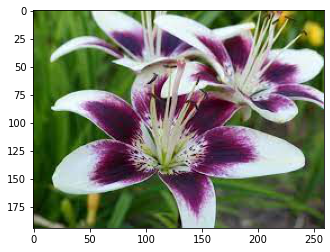

In [123]:
input_image="/content/download.jpg"
# Read Images
img = mpimg.imread(input_image)

# Output Images
plt.imshow(img)

img = keras.preprocessing.image.load_img(
   input_image , target_size=(224,224)
)




img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)

score = predictions[0]

result = np. where(score == np. amax(score))
#x=result.astype(int)

for i in result:
  x=int(i)
print('predicted label is {} and maximum score is {} :'.format( x,np.amax(score)))


substring1=['bougainvillea','daisies','garden_roses','gardenias','hibiscus','hydrangeas','lilies','orchids','peonies','tulip']
labels1=[0,1,2,3,4,5,6,7,8,9]
count=0
for i in substring1:
  if(count==x):
    print("The first prediction for flower is:",i)
    count=count+1
    break
  else:
    count=count+1
#print(score*100)
score = np. delete(score, count-1)

substring1.remove(i)


result = np. where(score == np. amax(score))
#print(score*100)
for i in result:
  x=int(i)
#print('predicted label is {} and maximum score is {} :'.format( x,np.amax(score)))
print("The second prediction for flower is:",substring1[x])
#print(score*100)
substring1.remove(substring1[x])
#print(substring1)
score = np. delete(score, 2)
result = np. where(score == np. amax(score))
#print(score*100)
for i in result:
  x=int(i)
#print('predicted label is {} and maximum score is {} :'.format( x,np.amax(score)))
print("The third prediction for flower is:",substring1[x])




predicted label is 7 and maximum score is 0.36744067072868347 :
The first prediction for flower is: orchids
The second prediction for flower is: garden_roses
The third prediction for flower is: hibiscus


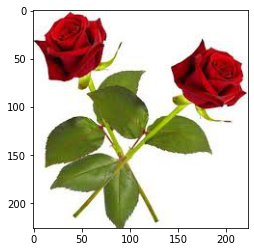

In [130]:
input_image="/images (1).jpg"
# Read Images
img = mpimg.imread(input_image)

# Output Images
plt.imshow(img)

img = keras.preprocessing.image.load_img(
   input_image , target_size=(224,224)
)




img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)

score = predictions[0]

result = np. where(score == np. amax(score))
#x=result.astype(int)

for i in result:
  x=int(i)
print('predicted label is {} and maximum score is {} :'.format( x,np.amax(score)))


substring1=['bougainvillea','daisies','garden_roses','gardenias','hibiscus','hydrangeas','lilies','orchids','peonies','tulip']
labels1=[0,1,2,3,4,5,6,7,8,9]
count=0
for i in substring1:
  if(count==x):
    print("The first prediction for flower is:",i)
    count=count+1
    break
  else:
    count=count+1
#print(score*100)
score = np. delete(score, count-1)

substring1.remove(i)


result = np. where(score == np. amax(score))
#print(score*100)
for i in result:
  x=int(i)
#print('predicted label is {} and maximum score is {} :'.format( x,np.amax(score)))
print("The second prediction for flower is:",substring1[x])
#print(score*100)
substring1.remove(substring1[x])
#print(substring1)
score = np. delete(score, 2)
result = np. where(score == np. amax(score))
#print(score*100)
for i in result:
  x=int(i)
#print('predicted label is {} and maximum score is {} :'.format( x,np.amax(score)))
print("The third prediction for flower is:",substring1[x])




predicted label is 0 and maximum score is 0.6147768497467041 :
The first prediction for flower is: bougainvillea
The second prediction for flower is: orchids
The third prediction for flower is: lilies


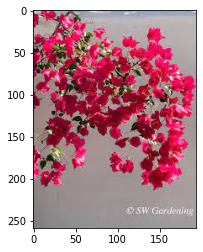

In [127]:
input_image="/download (3).jpg"
# Read Images
img = mpimg.imread(input_image)

# Output Images
plt.imshow(img)

img = keras.preprocessing.image.load_img(
   input_image , target_size=(224,224)
)




img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)

score = predictions[0]

result = np. where(score == np. amax(score))
#x=result.astype(int)

for i in result:
  x=int(i)
print('predicted label is {} and maximum score is {} :'.format( x,np.amax(score)))


substring1=['bougainvillea','daisies','garden_roses','gardenias','hibiscus','hydrangeas','lilies','orchids','peonies','tulip']
labels1=[0,1,2,3,4,5,6,7,8,9]
count=0
for i in substring1:
  if(count==x):
    print("The first prediction for flower is:",i)
    count=count+1
    break
  else:
    count=count+1
#print(score*100)
score = np. delete(score, count-1)

substring1.remove(i)


result = np. where(score == np. amax(score))
#print(score*100)
for i in result:
  x=int(i)
#print('predicted label is {} and maximum score is {} :'.format( x,np.amax(score)))
print("The second prediction for flower is:",substring1[x])
#print(score*100)
substring1.remove(substring1[x])
#print(substring1)
score = np. delete(score, 2)
result = np. where(score == np. amax(score))
#print(score*100)
for i in result:
  x=int(i)
#print('predicted label is {} and maximum score is {} :'.format( x,np.amax(score)))
print("The third prediction for flower is:",substring1[x])


